In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['en_test_2.csv', 'en_test.csv', 'en_sample_submission.csv', 'en_train.csv', 'en_sample_submission_2.csv']


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
training_data = pd.read_csv("../input/en_train.csv")

In [4]:
max_num_features = 10
space_letter = 0
space_padded_tokens = []

In [5]:
max_data_size = len(training_data)
training_data['class'].unique()

array(['PLAIN', 'PUNCT', 'DATE', 'LETTERS', 'CARDINAL', 'VERBATIM',
       'DECIMAL', 'MEASURE', 'MONEY', 'ORDINAL', 'TIME', 'ELECTRONIC',
       'DIGIT', 'FRACTION', 'TELEPHONE', 'ADDRESS'], dtype=object)

In [6]:
test_dataset = pd.read_csv("../input/en_test.csv")

In [7]:
training_data.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918441 entries, 0 to 9918440
Data columns (total 5 columns):
sentence_id    int64
token_id       int64
class          object
before         object
after          object
dtypes: int64(2), object(3)
memory usage: 378.4+ MB


In [9]:
test_dataset.head()

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


In [10]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088564 entries, 0 to 1088563
Data columns (total 3 columns):
sentence_id    1088564 non-null int64
token_id       1088564 non-null int64
before         1088551 non-null object
dtypes: int64(2), object(1)
memory usage: 24.9+ MB


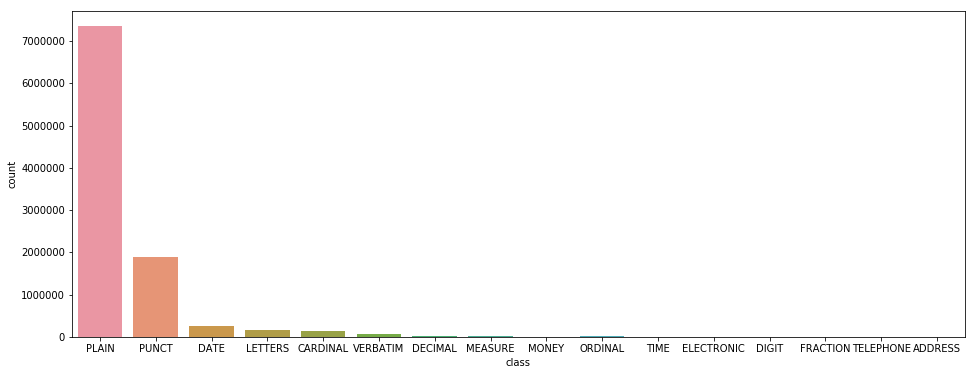

In [11]:
fig = plt.figure(figsize=(16,6))
sns.countplot(x='class',data = training_data)

In [12]:
training_data['class'].value_counts().sort_values(ascending = False)

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

In [13]:
training_data.isnull().any()

sentence_id    False
token_id       False
class          False
before          True
after           True
dtype: bool

In [14]:
training_data[training_data['class']=='PUNCT'].head()

,sentence_id,token_id,class,before,after
9,0,9,PUNCT,.,.
17,1,7,PUNCT,.,.
25,2,7,PUNCT,",",","
28,2,10,PUNCT,",",","
31,2,13,PUNCT,",",","


In [15]:
training_data[training_data['class']=='DATE'].head()

,sentence_id,token_id,class,before,after
10,1,0,DATE,2006,two thousand six
51,3,7,DATE,2007,two thousand seven
80,5,0,DATE,2008,two thousand eight
111,8,1,DATE,4 March 2014,the fourth of march twenty fourteen
147,11,1,DATE,"April 10, 2013",april tenth twenty thirteen


In [16]:
training_data[training_data['class']=='LETTERS'].head()

,sentence_id,token_id,class,before,after
11,1,1,LETTERS,IUCN,i u c n
115,9,2,LETTERS,BC,b c
159,14,2,LETTERS,ALCS,a l c s
201,18,2,LETTERS,C.,c
205,18,6,LETTERS,J.,j


In [17]:
num_train_sent = len(training_data.sentence_id.unique())
num_train_sent

748066

In [ ]:
train_sent = training_data.groupby("sentence_id")["sentence_id"].count()
train_sent.describe()